In [1]:
# Import the main libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## Data preprocessing

#### To avoid overfitting, it is a good idea to apply some filters, such as flips, zooms, rotations, etc., to the images

### Training set

In [12]:
train_data_gen = ImageDataGenerator(rescale = 1./255,          # Feature scaling dividing the pixels by 255 (like a normalisation)
                                   shear_range = 0.2,          
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

training_set = train_data_gen.flow_from_directory('training_set',
                                                 target_size = (64, 64),     # Final size of the images when they are fed to the CNN
                                                 batch_size = 32,            # Size of the images in each batch
                                                 class_mode = 'binary')      # Binary since we will have cat/dog results instead of categorical

Found 8000 images belonging to 2 classes.


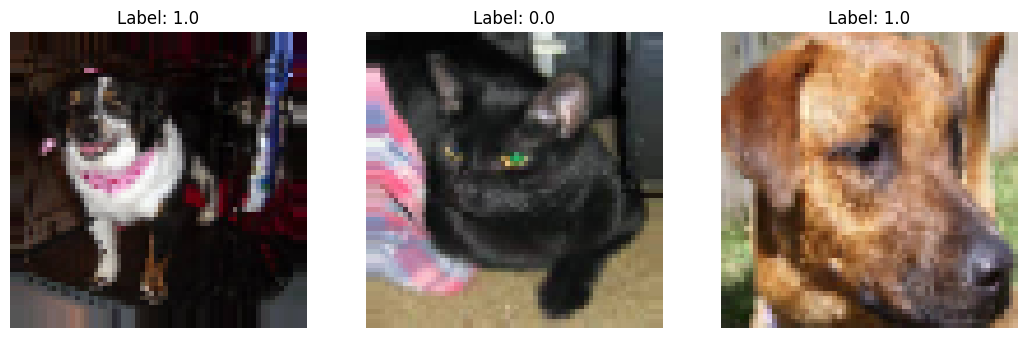

In [27]:
# Get one batch of images (32 images in this case, but we'll pick 3 random ones)
images, labels = next(training_set)

# Select 3 random images from the batch
random_indices = np.random.choice(images.shape[0], 3, replace=False)  # Select 3 random indices
random_images = images[random_indices]

# Plot the 3 random images
fig, axes = plt.subplots(1, 3, figsize=(13, 5))

for i, ax in enumerate(axes):
    ax.imshow(random_images[i])  # Display each image
    ax.axis('off')  # Hide axes
    ax.set_title(f"Label: {labels[random_indices[i]]}")  # Show the label (0 or 1)

plt.show()

### Test set

In [16]:
test_data_gen = ImageDataGenerator(rescale = 1./255)
test_set = test_data_gen.flow_from_directory('test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 2000 images belonging to 2 classes.


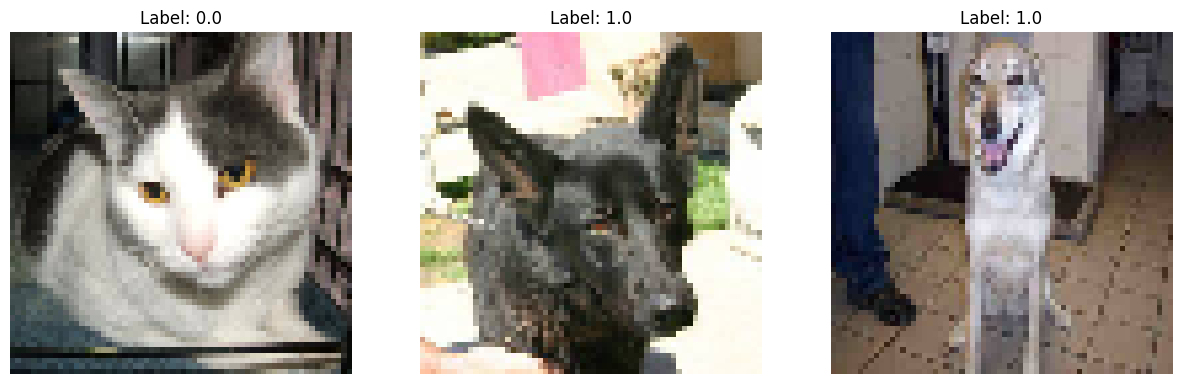

In [31]:
# Get one batch of images (32 images in this case, but we'll pick 3 random ones)
images, labels = next(test_set)

# Select 3 random images from the batch
random_indices = np.random.choice(images.shape[0], 3, replace=False)  # Select 3 random indices
random_images = images[random_indices]

# Plot the 3 random images
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, ax in enumerate(axes):
    ax.imshow(random_images[i])  # Display each image
    ax.axis('off')  # Hide axes
    ax.set_title(f"Label: {labels[random_indices[i]]}")  # Show the label (0 or 1)

plt.show()

## Model selection

In [41]:
cnn = tf.keras.models.Sequential()   # Initialising the CNN

cnn.add(tf.keras.layers.Conv2D(filters =32, kernel_size = 3, activation = 'relu', input_shape = [64, 64, 3])) # Convolution

cnn.add(tf.keras.layers.MaxPool2D(pool_size = 2, strides = 2))                                                # Pooling

cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))                                 # Second convolutional layer
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn.add(tf.keras.layers.Flatten())                                                                            # Flattening

cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))                                                  # Full connection

cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))                                                 # Output layer
 
cnn.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 29, 29, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │         802,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 813,217 (3.10 MB)

 Trainable params: 813,217 (3.10 MB)

 Non-trainable params: 0 (0.00 B)

In [43]:
cnn.compile(optimizer = 'adam',
           loss = 'binary_crossentropy',
           metrics = ['accuracy'])

In [45]:
cnn.fit(x = training_set, validation_data = test_set, epochs = 25)

Epoch 1/25


C:\Users\gabri\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


250/250 ━━━━━━━━━━━━━━━━━━━━ 52s 193ms/step - accuracy: 0.5650 - loss: 0.6801 - val_accuracy: 0.6180 - val_loss: 0.6485
Epoch 2/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 49s 192ms/step - accuracy: 0.6678 - loss: 0.6113 - val_accuracy: 0.6220 - val_loss: 0.6606
Epoch 3/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 50s 195ms/step - accuracy: 0.6937 - loss: 0.5821 - val_accuracy: 0.7195 - val_loss: 0.5433
Epoch 4/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 48s 189ms/step - accuracy: 0.7230 - loss: 0.5436 - val_accuracy: 0.7420 - val_loss: 0.5277
Epoch 5/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 47s 184ms/step - accuracy: 0.7406 - loss: 0.5177 - val_accuracy: 0.7355 - val_loss: 0.5558
Epoch 6/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 47s 184ms/step - accuracy: 0.7606 - loss: 0.4921 - val_accuracy: 0.7540 - val_loss: 0.4998
Epoch 7/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 47s 183ms/step - accuracy: 0.7685 - loss: 0.4728 - val_accuracy: 0.7800 - val_loss: 0.4672
Epoch 8/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 47s 183ms/step - accuracy: 0.7793 - loss: 0.4654 - val

## Single prediction

In [53]:
from tensorflow.keras.preprocessing import image
test_image = image.load_img('single_prediction/cat_or_dog_1.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
  prediction = 'dog'
else:
  prediction = 'cat'

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


In [55]:
print(prediction)

dog


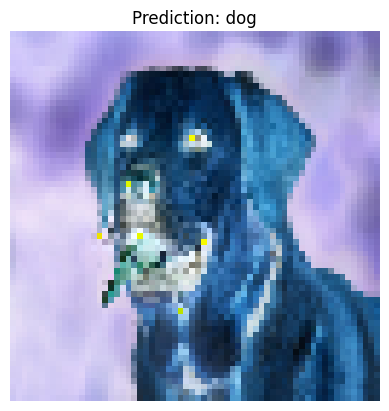

In [61]:
# Since the image was rescaled to [0, 1], rescale back to [0, 255] for displaying
test_image_display = test_image[0] * 255  # Reverse the rescaling

# Plot the image with the prediction as the title
plt.imshow(test_image_display.astype(np.uint8))  # Convert to uint8 before displaying
plt.axis('off')  # Hide axes
plt.title(f'Prediction: {prediction}')  # Set the title with the prediction
plt.show()